In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


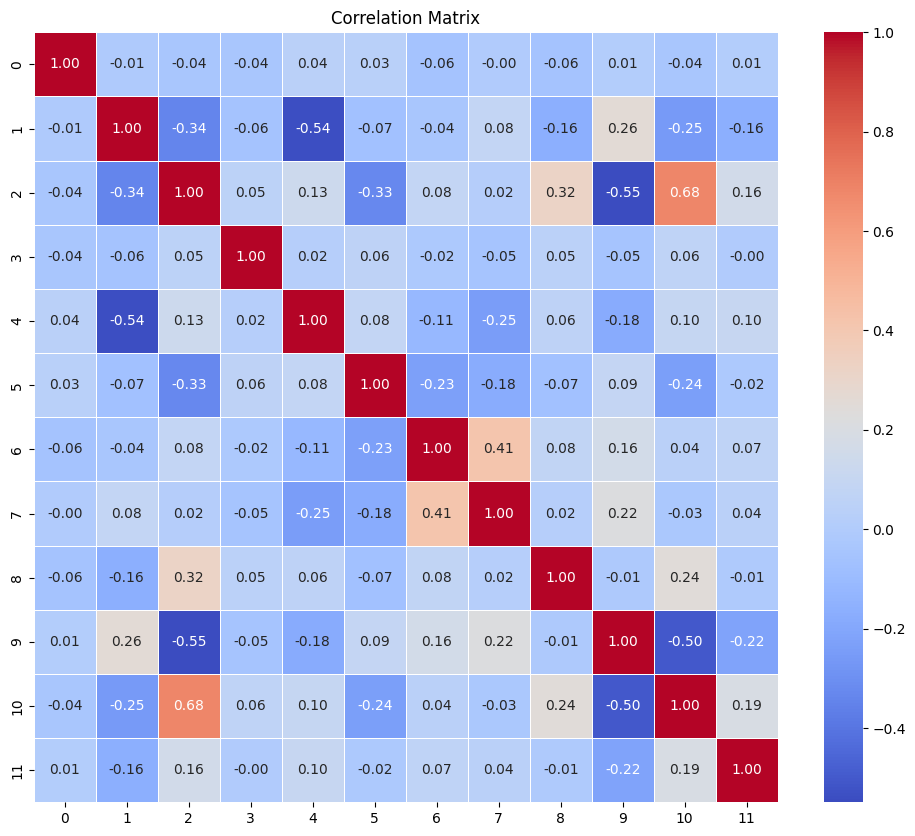

In [3]:
# Load the dataset
dataframe = pd.read_csv("/Users/aditya/Downloads/titanic.csv")

# Encode non-integer columns
le = LabelEncoder()
non_integer_columns = dataframe.select_dtypes(include=['object']).columns
for col in non_integer_columns:
    dataframe[col] = le.fit_transform(dataframe[col])

# Replace 'NaN' with np.nan
dataframe.replace('NaN', np.nan, inplace=True)

# Impute missing values
imp = SimpleImputer(strategy='mean')
dataframe = imp.fit_transform(dataframe)

# Convert NumPy array back to pandas DataFrame
dataframe = pd.DataFrame(dataframe)

# Plot correlation matrix
correlation_matrix = dataframe.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Normalization function
def normalize(dataframe):
    means = dataframe.mean()
    standard_deviations = dataframe.std()
    scaled_dataframe = (dataframe - means) / standard_deviations
    return scaled_dataframe

# Apply normalization
scaled_dataframe = normalize(dataframe)

# Extract features (X) and target variable (Y)
X = scaled_dataframe.drop(0, axis=1)  # drop 'Survived' column
Y = scaled_dataframe[0]  # 'Survived' column

# Split the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# Initialize weights and bias
np.random.seed(0)
w = np.random.rand(X_train.shape[1])  
b = np.random.rand()  

# Training parameters
epochs = 1500
lr = 0.05
expanding_rate = 0.99
retracting_rate = 1.01


In [6]:
# Training loop
for _ in range(epochs):
    # Pick a random data point from the training set
    i = np.random.randint(0, len(X_train))
    x, y = X_train.iloc[i], Y_train.iloc[i]

    # Compute prediction
    y_pred = np.dot(w, x) + b

    # Update weights and bias based on classification
    if (y_pred > 0 and y > 0) or (y_pred < 0 and y < 0):
        # Correctly classified
        if abs(y_pred) < 1:
            # In the margin or margin is too wide
            w = w + x * y * lr * retracting_rate
            b = b + y * lr * retracting_rate
        else:
            # Margin is too narrow
            w = w * expanding_rate
            b = b * expanding_rate
    else:
        # Misclassified
        w = w + x * y * lr * expanding_rate
        b = b + y * lr * expanding_rate

# Predictions on validation set
y_preds = []
for i in range(len(X_valid)):
    x, y = X_valid.iloc[i], Y_valid.iloc[i]
    y_pred = np.dot(w, x) + b
    y_preds.append(y_pred)

# Convert predictions to binary labels using a threshold
threshold = 0.5  
y_binary_preds = [1 if pred > threshold else 0 for pred in y_preds]

# Convert Y_valid to binary labels 
y_binary_valid = [1 if label > 0.5 else 0 for label in Y_valid]

# Calculate F1 score
f1 = f1_score(y_binary_valid, y_binary_preds)

print("F1 Score:", f1)


F1 Score: 0.4375
